### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
import pandas as pd
BEFORE=pd.read_csv("The E-Commerce dataset.csv")
display("Display the DataFrame",BEFORE.head())
n_null=BEFORE.isnull().sum()
print("\ncounting number of Null values in each column\n\n",n_null)
AFTER=BEFORE.dropna()
print("\nprint the length of the data before\n",len(BEFORE))
print("\nand after removing the missing data\n",len(AFTER))

'Display the DataFrame'

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31



counting number of Null values in each column

 userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

print the length of the data before
 20000

and after removing the missing data
 19934


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [13]:
print("Q2.1 total number of unique users\n",AFTER['userId'].nunique())
print("\nQ2.1 total number of unique reviews\n",AFTER['review'].nunique())
print("\nQ2.1 total number of unique items\n",AFTER['item'].nunique())
print("\nQ2.1 total number of unique categories\n",AFTER['category'].nunique())
print("\n\nQ2.2 total number of all rating records\n",len(AFTER['rating']))
stats=AFTER['rating'].describe()
print("\nQ2.2 mean regarding all rating records\n",stats['mean'])
print("\nQ2.2 mean regarding all rating records\n",stats['std'])
print("\nQ2.2 mean regarding all rating records\n",stats['min'])
print("\nQ2.2 mean regarding all rating records\n",stats['max'])
print("\n\nQ2.3 just to check there is only M or F for gender selection\n",AFTER['gender'].nunique())
n_M=AFTER['gender'].value_counts()['M']
n_F=AFTER['gender'].value_counts()['F']
print("\nQ2.3 number of items rated by males\n",n_M)
print("\nQ2.3 number of items rated by females\n",n_F)
print("\nQ2.3 mean of the number of items rated by different genders\n",(n_M+n_F)/2)
print("\nQ2.3 std of the number of items rated by different genders\n",0)
print("\nQ2.3 min of the number of items rated by different genders\n",min(n_M,n_F))
print("\nQ2.3 max of the number of items rated by different genders\n",max(n_M,n_F),"\n\n")
NEWDF=AFTER['item'].value_counts()
NEWDF=pd.DataFrame(NEWDF)
NEWDF.columns=['count']
stats=NEWDF['count'].describe()
display("Q2.4 Number of ratings per each item",NEWDF.head())
print("\nQ2.4 mean of the number of ratings that are received by each items\n",stats['mean'])
print("\nQ2.4 std of the number of ratings that are received by each items\n",stats['std'])
print("\nQ2.4 min of the number of ratings that are received by each items\n",stats['min'])
print("\nQ2.4 max of the number of ratings that are received by each items\n",stats['max'])

Q2.1 total number of unique users
 8565

Q2.1 total number of unique reviews
 19460

Q2.1 total number of unique items
 89

Q2.1 total number of unique categories
 9


Q2.2 total number of all rating records
 19934

Q2.2 mean regarding all rating records
 3.701414668405739

Q2.2 mean regarding all rating records
 1.40454608926479

Q2.2 mean regarding all rating records
 1.0

Q2.2 mean regarding all rating records
 5.0


Q2.3 just to check there is only M or F for gender selection
 2

Q2.3 number of items rated by males
 10135

Q2.3 number of items rated by females
 9799

Q2.3 mean of the number of items rated by different genders
 9967.0

Q2.3 std of the number of items rated by different genders
 0

Q2.3 min of the number of items rated by different genders
 9799

Q2.3 max of the number of items rated by different genders
 10135 




'Q2.4 Number of ratings per each item'

,count
item,
AOL (America Online),941
All Advantage,657
eBay,596
McDonald's,416
NetZero,351



Q2.4 mean of the number of ratings that are received by each items
 223.97752808988764

Q2.4 std of the number of ratings that are received by each items
 116.6085114552974

Q2.4 min of the number of ratings that are received by each items
 139.0

Q2.4 max of the number of ratings that are received by each items
 941.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

Q3.1 Correlation between gender and ratings




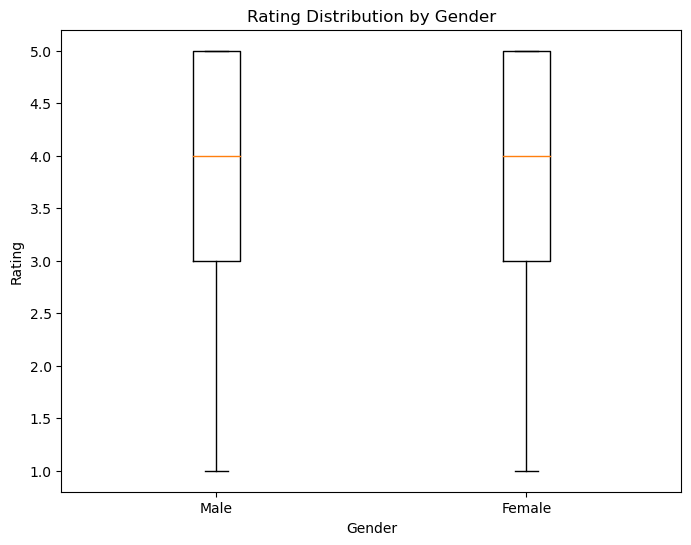


Above boxplot shows almost no difference of rating distribution between the genders.


Conduct a t-test.
Null Hypothesis: There is no difference in ratings between male and female users
Alt Hypothesis: Not null

t-statistic:  -1.551802664283532

P-value:  0.12072532506277635


Since p-value is greater than 0.05, Enough evidence to retain the null hypethesis: There is no difference in ratings between male and female users.


Q3.2 Correlation between helpfulness and ratings


               rating  helpfulness
rating       1.000000    -0.000717
helpfulness -0.000717     1.000000


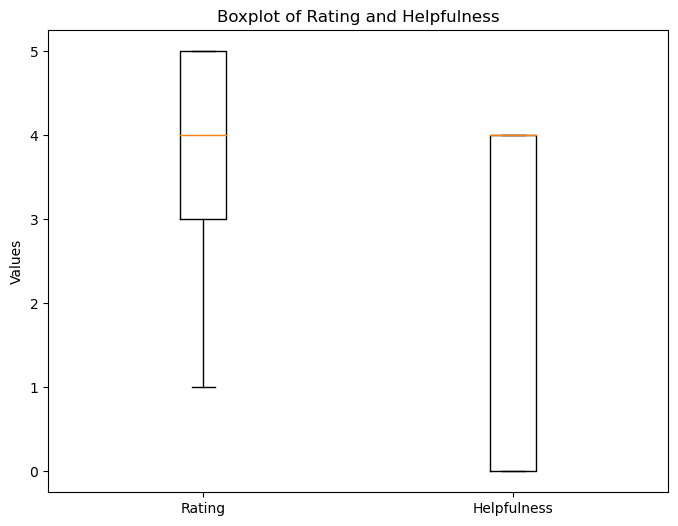


The above boxplot shows majority of users chose 4 as the helpfulness. This suggests a limitation to the meaningfulness of the helpfulness data. The correlation is close to zero. Using the two results, it seems to be safe to conclude that there is no correlation between helpfulness and ratings.


Q3.3 Correlation between category and ratings




<Figure size 1200x800 with 0 Axes>

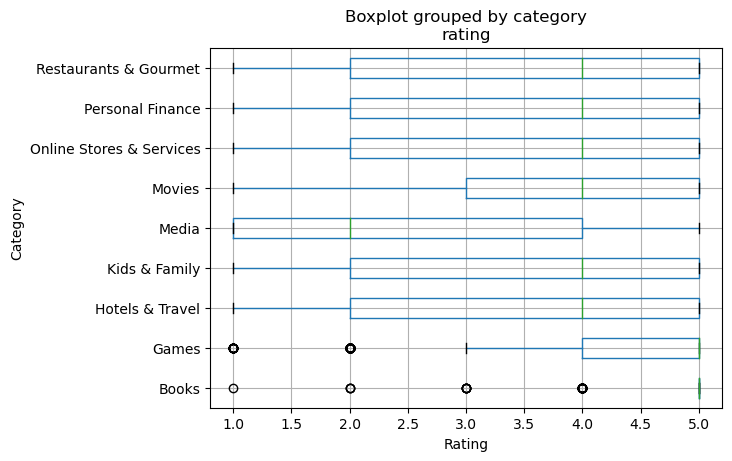


Observing distributions and medians, there seems to be some significant differences. For example, media and games have very different ratings. This is a hint we have a correlation between category and ratings.




conduct ANOVA test.

Null hypothesis: The mean ratings of all categories are equal.
Alt hypothesis: Not null.

F-statistic: 161.08393853219957
P-value: 2.602433059327111e-264

With very small p-value, there is enough evidence to reject the null hypothesis: There is at least one group mean that is significantly different from the others. This conclusion is equivalent to the statement that there is a correlation between category and ratings.


In [71]:
import matplotlib.pyplot as plt
RATINGBYM = AFTER[AFTER['gender'] == 'M']['rating']
RATINGBYF = AFTER[AFTER['gender'] == 'F']['rating']

print("Q3.1 Correlation between gender and ratings\n\n")

plt.figure(figsize=(8, 6))
plt.boxplot([RATINGBYM.values, RATINGBYF.values], labels=['Male', 'Female'])
plt.title('Rating Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

print("\nAbove boxplot shows almost no difference of rating distribution between the genders.\n\n")


from scipy.stats import ttest_ind

R_Ｍ=AFTER[AFTER['gender']=='M']['rating']
R_F=AFTER[AFTER['gender']=='F']['rating']

t_stat, p_value=ttest_ind(R_M,R_F)

print("Conduct a t-test.\nNull Hypothesis: There is no difference in ratings between male and female users\nAlt Hypothesis: Not null\n\nt-statistic: ",t_stat)
print("\nP-value: ",p_value)
print("\n\nSince p-value is greater than 0.05, Enough evidence to retain the null hypethesis: There is no difference in ratings between male and female users.")


print("\n\nQ3.2 Correlation between helpfulness and ratings\n\n")

HELPFULNESS=AFTER[['rating','helpfulness']]

corr=HELPFULNESS.corr(method='pearson')

print(corr)

plt.figure(figsize=(8, 6))
plt.boxplot([AFTER['rating'], AFTER['helpfulness']], labels=['Rating', 'Helpfulness'])
plt.title('Boxplot of Rating and Helpfulness')
plt.ylabel('Values')
plt.show()

print("\nThe above boxplot shows majority of users chose 4 as the helpfulness. This suggests a limitation to the meaningfulness of the helpfulness data. The correlation is close to zero. Using the two results, it seems to be safe to conclude that there is no correlation between helpfulness and ratings.")

print("\n\nQ3.3 Correlation between category and ratings\n\n")

plt.figure(figsize=(12, 8))
AFTER.boxplot(column='rating', by='category', vert=False)
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

print("\nObserving distributions and medians, there seems to be some significant differences. For example, media and games have very different ratings. This is a hint we have a correlation between category and ratings.\n\n")

from scipy.stats import f_oneway

anova = f_oneway(*[group["rating"] for name, group in AFTER.groupby("category")])

print("\n\nconduct ANOVA test.\n\nNull hypothesis: The mean ratings of all categories are equal.\nAlt hypothesis: Not null.\n")

print("F-statistic:", anova.statistic)
print("P-value:", anova.pvalue)

print("\nWith very small p-value, there is enough evidence to reject the null hypothesis: There is at least one group mean that is significantly different from the others. This conclusion is equivalent to the statement that there is a correlation between category and ratings.")

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [75]:
AFTERAFTER=AFTER[AFTER['helpfulness']>2]
userCOUNT=AFTERAFTER['userId'].value_counts()
validUSER=userCOUNT[userCOUNT>6].index
AFTERAFTER=AFTERAFTER[AFTERAFTER['userId'].isin(validUSER)]
itemCOUNT=AFTERAFTER.groupby('item')['rating'].count()
validITEM=itemCOUNT[itemCOUNT>10].index
AFTERAFTER=AFTERAFTER[AFTERAFTER['item'].isin(validITEM)]
print("\n\nQ4 Removing corresponding records\n")
print("Please note I chose counter-removing method: I just kept filtering down by conditions that counter the given conditions:\n\n",len(AFTERAFTER))



Q4 Removing corresponding records

Please note I chose counter-removing method: I just kept filtering down by conditions that counter the given conditions.

 2696
